## Obtaining the data

In [1]:
import os
import glob
import pandas as pd

In [2]:
# Here we print the names of all the csv files in this directory
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['product_info.csv',
 'reviews_0-250.csv',
 'reviews_1250-end.csv',
 'reviews_250-500.csv',
 'reviews_500-750.csv',
 'reviews_750-1250.csv']

In [3]:
# We only want the csv files containing reviews
csv_files.pop(0)
# csv_files.pop(0)
# We will combine their contents into one data frame
df = pd.DataFrame()
for file in csv_files:
    df = pd.concat([df, pd.read_csv(file)])
len(df)

C:\Users\lsikk\AppData\Local\Temp\ipykernel_27128\2293361336.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df, pd.read_csv(file)])
C:\Users\lsikk\AppData\Local\Temp\ipykernel_27128\2293361336.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df, pd.read_csv(file)])
C:\Users\lsikk\AppData\Local\Temp\ipykernel_27128\2293361336.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df, pd.read_csv(file)])


1094411

In [4]:
# Let's look at a sample of this dataset
df.head(5)

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [5]:
# Let's drop the columns that are irrelevant to this task
irrelevant_features = ['Unnamed: 0',
                       'author_id',
                       'is_recommended', 
                       'helpfulness', 
                       'total_feedback_count',
                       'total_neg_feedback_count',
                       'total_pos_feedback_count',
                       'submission_time',
                       'review_text',
                       'review_title',
                       'price_usd'
                      ]
df = df.drop(columns=irrelevant_features)

In [6]:
# Let's look at the remaining columns and their data types
df.dtypes

rating           int64
skin_tone       object
eye_color       object
skin_type       object
hair_color      object
product_id      object
product_name    object
brand_name      object
dtype: object

In [7]:
# Let's look at a sample of the dataset with filtered columns
df.head(5)

,rating,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name
0,5,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX
1,1,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE
2,5,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE
3,5,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE
4,5,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE


In [8]:
# Now let's enrich the dataset with product information
products_df = pd.read_csv('./product_info.csv')
merged_df = pd.merge(df, products_df[['product_id','ingredients', 'primary_category','secondary_category', 'tertiary_category']], on='product_id')
merged_df.dtypes

rating                 int64
skin_tone             object
eye_color             object
skin_type             object
hair_color            object
product_id            object
product_name          object
brand_name            object
ingredients           object
primary_category      object
secondary_category    object
tertiary_category     object
dtype: object

## Exploratory Data Analysis

In [9]:
# Let's just inspect how the data frame looks like
merged_df.head(5)

,rating,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,ingredients,primary_category,secondary_category,tertiary_category
0,5,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,"['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...",Skincare,Cleansers,NaN
1,1,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,"['Diisostearyl Malate, Hydrogenated Polyisobut...",Skincare,Lip Balms & Treatments,NaN
2,5,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,"['Diisostearyl Malate, Hydrogenated Polyisobut...",Skincare,Lip Balms & Treatments,NaN
3,5,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,"['Diisostearyl Malate, Hydrogenated Polyisobut...",Skincare,Lip Balms & Treatments,NaN
4,5,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,"['Diisostearyl Malate, Hydrogenated Polyisobut...",Skincare,Lip Balms & Treatments,NaN


In [10]:
# Here we check how many products are reviewed
products = merged_df['product_id'].unique()
len(products)

2351

### Numerical Variables

In [11]:
# Let's check the average rating given by reviews
ratings = merged_df['rating']
ratings.mean()

4.299158177320952

In [12]:
# Let's check the standard deviation 
ratings.std()

1.1494435956270102

In [13]:
# Let's see the mode rating
ratings.mode()

0    5
Name: rating, dtype: int64

In [14]:
# Let's check the median rating
ratings.median()

5.0

In [15]:
# Here are some other descriptive statistics
ratings.describe()

count    1.094411e+06
mean     4.299158e+00
std      1.149444e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

C:\Users\lsikk\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


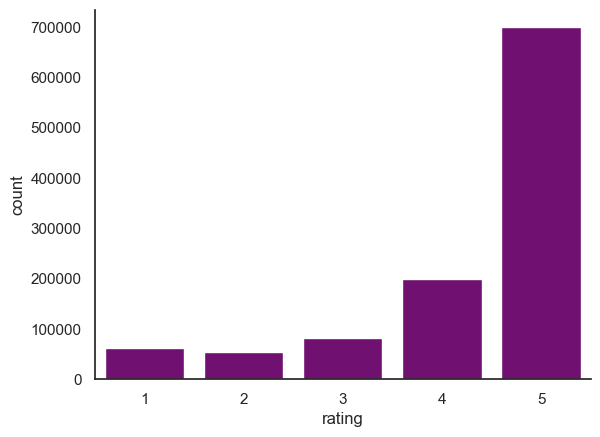

In [16]:
# Here we visualize the rating distribution 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='white')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.countplot(data=merged_df, x='rating', color='purple')
plt.show()

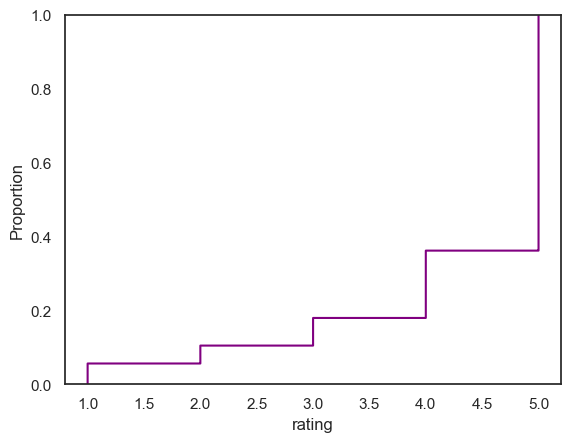

In [17]:
# Maybe we can better visualize the ratings through a CDF

sns.ecdfplot(data=merged_df, x= 'rating', color='purple')
plt.show()

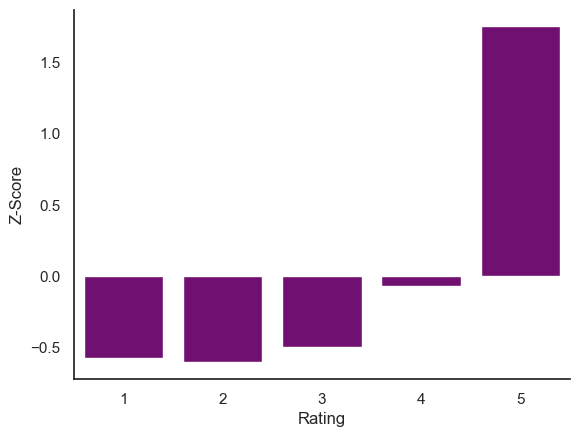

In [19]:
# Let's try normalizing this distribution using Z-scores
rating_counts = merged_df['rating'].value_counts()
rating_counts_zscore = (rating_counts - rating_counts.mean()) / rating_counts.std() # z = (x - mu) / sigma

sns.barplot(x=rating_counts_zscore.index, y=rating_counts_zscore.values, color='purple')

plt.xlabel('Rating')
plt.ylabel('Z-Score')

# Here I remove the top and right borders so that this figure follows the correct Data-Ink ratio
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [20]:
# Here we will perform a KS test againts a normal distribution to see if the Z-score normalization worked
from scipy.stats import kstest

kstest(rating_counts_zscore, 'norm')

KstestResult(statistic=0.3282786390604352, pvalue=0.5524957379157138)

### Categorical Variables

In [21]:
# Let's summarize the descriptive statistics for the physical features of users
merged_df['skin_tone'].value_counts(normalize=True)

light          0.288371
fair           0.225176
lightMedium    0.212736
medium         0.076294
mediumTan      0.067602
fairLight      0.060861
tan            0.036453
deep           0.022299
rich           0.005946
olive          0.001873
porcelain      0.001745
dark           0.000565
notSureST      0.000076
ebony          0.000003
Name: skin_tone, dtype: float64

In [22]:
merged_df['eye_color'].value_counts(normalize=True)

brown    0.532538
blue     0.194423
hazel    0.133585
green    0.133260
Grey     0.005492
gray     0.000702
Name: eye_color, dtype: float64

In [23]:
merged_df['eye_color'] = merged_df['eye_color'].replace('Grey', 'gray')
merged_df['eye_color'].value_counts(normalize=True)

brown    0.532538
blue     0.194423
hazel    0.133585
green    0.133260
gray     0.006194
Name: eye_color, dtype: float64

In [24]:
df['skin_type'].value_counts(normalize=True)

combination    0.554012
dry            0.189181
normal         0.134211
oily           0.122596
Name: skin_type, dtype: float64

In [25]:
df['hair_color'].value_counts(normalize=True)

brown       0.464591
blonde      0.234261
black       0.217145
auburn      0.035897
red         0.029709
brunette    0.012149
gray        0.006248
Name: hair_color, dtype: float64

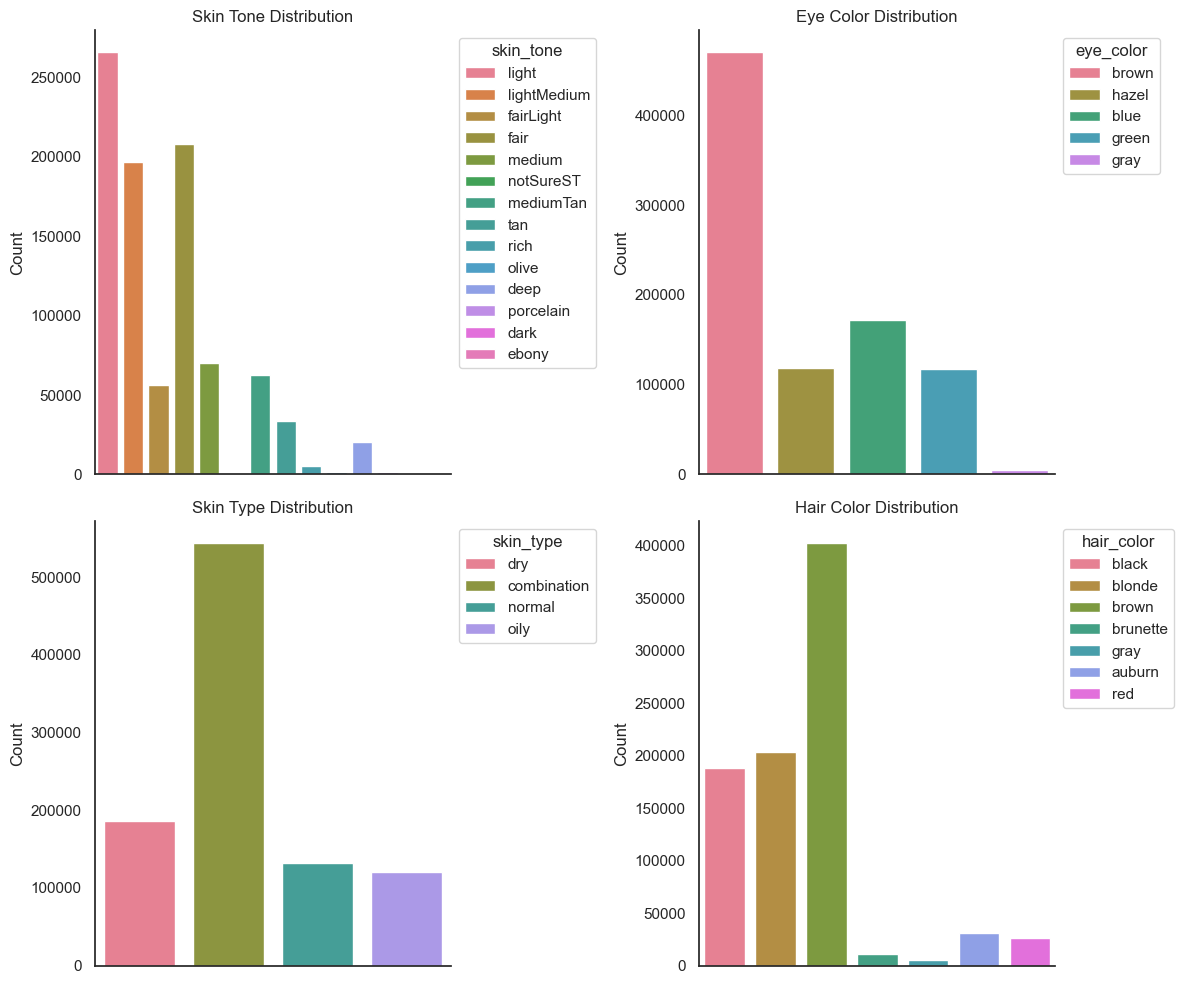

In [26]:
# Let's visualize all these together

# Here I specify that there will be 4 columns 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

axes = axes.flatten()

for ax, column in zip(axes, ['skin_tone', 'eye_color', 'skin_type', 'hair_color']):
    sns.countplot(data=merged_df, x=column, palette='husl', ax=ax, hue=column, dodge=False) # color-coded frequency plot
    ax.set_xticklabels([]) 
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    title = ' '.join(column.split('_')).title() # preprocessing the title so it appears capitalized and spaced
    ax.set_title(f'{title} Distribution')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # moving the legend away from the graph to avoid clutter
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [27]:
# Now let's look at the different product categories
product_categories = merged_df[['primary_category', 'secondary_category', 'tertiary_category']]
product_categories.describe()

,primary_category,secondary_category,tertiary_category
count,1094411,1094411,933155
unique,1,13,30
top,Skincare,Moisturizers,Moisturizers
freq,1094411,297399,206124


In [28]:
# Since the primary catgeory is always skincare, we can remove it and focus on the other ones
product_categories = product_categories.drop(columns=['primary_category'])
product_categories.describe()

,secondary_category,tertiary_category
count,1094411,933155
unique,13,30
top,Moisturizers,Moisturizers
freq,297399,206124


In [29]:
product_categories['secondary_category'].value_counts()

Moisturizers              297399
Treatments                222042
Cleansers                 200604
Mini Size                  85498
Eye Care                   74999
Masks                      70531
Lip Balms & Treatments     61688
Sunscreen                  41139
Value & Gift Sets          12099
Self Tanners               11942
Wellness                   10530
High Tech Tools             5925
Shop by Concern               15
Name: secondary_category, dtype: int64

In [30]:
product_categories['tertiary_category'].value_counts()

Moisturizers                 206124
Face Serums                  174600
Face Wash & Cleansers        121722
Eye Creams & Treatments       70440
Face Masks                    66835
Face Oils                     41858
Face Sunscreen                39088
Toners                        35860
Mists & Essences              31658
Facial Peels                  27757
Exfoliators                   26846
Blemish & Acne Treatments     19685
Makeup Removers               11245
Night Creams                   8903
BB & CC Creams                 7884
Beauty Supplements             7725
For Face                       5753
For Body                       5136
Face Wipes                     4707
Eye Masks                      4559
Sheet Masks                    3696
Anti-Aging                     3126
Facial Rollers                 1712
Body Sunscreen                 1302
Facial Cleansing Brushes       1223
Holistic Wellness              1093
Teeth Whitening                 973
Decollete & Neck Creams     

In [31]:
# Tertiary categories overlaps with secondary categories and offer more detailed classifications

## Data Preprocessing

### Imputation

In [33]:
# Let's check if there are missing values in the columns of interest
final_df = merged_df.drop(columns=['product_id','primary_category','secondary_category', 'product_name', 'brand_name'])
final_df.isna().sum()

rating                    0
skin_tone            170539
eye_color            209628
skin_type            111557
hair_color           226768
ingredients           22025
tertiary_category    161256
dtype: int64

In [34]:
# From the above values, we can see that all columns have at least 80% of the data present, so we do not have to drop them

# Let's start with the physical features
final_df.iloc[:,1:5].describe(include='object')

,skin_tone,eye_color,skin_type,hair_color
count,923872,884783,982854,867643
unique,14,5,4,7
top,light,brown,combination,brown
freq,266418,471181,544513,403099


In [36]:
# Here we want to see what are the most frequent combinations for skin_tone, eye_color, skin_type, hair_color

# Here we create a new column with combination of all features
features = ['skin_tone', 'eye_color', 'skin_type', 'hair_color']
feature_combinations = final_df[features].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

# This will find the frequency of every unique combination
feature_combination_counts = feature_combinations.value_counts()
feature_combination_counts  

nan_nan_nan_nan                        105827
lightMedium_brown_combination_brown     37770
light_brown_combination_brown           32197
nan_nan_combination_nan                 24679
lightMedium_brown_combination_black     23490
                                        ...  
tan_gray_oily_brunette                      1
deep_nan_normal_brunette                    1
fair_nan_nan_brunette                       1
lightMedium_green_nan_blonde                1
olive_brown_normal_red                      1
Length: 1920, dtype: int64

In [37]:
# The goal is for the imputation strategy to preserve the above findings in the data distribution
from sklearn.impute import SimpleImputer

# We will use mode as the imputation strategy

imputer = SimpleImputer(strategy='most_frequent')
df_imputed_mode = final_df.copy()
df_imputed_mode[:] = imputer.fit_transform(final_df)
df_imputed_mode.isna().sum()

rating               0
skin_tone            0
eye_color            0
skin_type            0
hair_color           0
ingredients          0
tertiary_category    0
dtype: int64

In [38]:
# Here we create a new column with combination of all features
mode_feature_combinations = df_imputed_mode[features].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

# This will find the frequency of every unique combination
mode_feature_combination_counts = mode_feature_combinations.value_counts()
mode_feature_combination_counts  

light_brown_combination_brown          179155
lightMedium_brown_combination_brown     46262
fair_brown_combination_brown            26900
lightMedium_brown_combination_black     23816
light_brown_dry_brown                   23351
                                        ...  
deep_green_normal_auburn                    1
deep_blue_normal_blonde                     1
lightMedium_gray_dry_red                    1
notSureST_hazel_normal_blonde               1
olive_brown_normal_red                      1
Length: 1207, dtype: int64

In [39]:
df_imputed_mode.iloc[:,1:5].describe(include='object')

,skin_tone,eye_color,skin_type,hair_color
count,1094411,1094411,1094411,1094411
unique,14,5,4,7
top,light,brown,combination,brown
freq,436957,680809,656070,629867


### Sampling

In [40]:
# The dataset is too large for processing, so I will sample what my computer can handle
import random

sample_indices = random.sample(range(len(df)), 10000)
sample_df = df_imputed_mode.iloc[sample_indices]
len(sample_df)

10000

In [41]:
# Now the goal is to compare the descriptive statistics of the sample with the original
original_ratings = df_imputed_mode['rating']
sample_ratings = sample_df['rating']

In [44]:
# We want to see if the difference in mean rating is statistically significant
from scipy.stats import ttest_ind

# Need to Z-Score normalize the original ratings and the sample ratings before the t-test since it assumes normality
original_rating_counts = original_ratings.value_counts()
original_rating_counts_zscore = (original_rating_counts - original_rating_counts.mean()) / original_rating_counts.std()

sample_rating_counts = sample_ratings.value_counts()
sample_rating_counts_zscore = (sample_rating_counts - sample_rating_counts.mean()) / sample_rating_counts.std()


ttest_ind(original_rating_counts_zscore, sample_rating_counts_zscore)

Ttest_indResult(statistic=-1.0532500405730104e-16, pvalue=1.0)

## Modelling and Analysis

In [45]:
sample_df.head(5)

,rating,skin_tone,eye_color,skin_type,hair_color,ingredients,tertiary_category
872664,5,fair,blue,combination,blonde,"['Water/Aqua/Eau, Dicaprylyl Carbonate, Butyro...",Eye Creams & Treatments
389579,4,fair,brown,combination,brown,"['Water, Caprylic/Capric Triglyceride, Cetyl A...",Face Serums
87062,5,medium,brown,oily,brown,"['Aqua (Water), Niacinamide, Pentylene Glycol,...",Face Serums
564292,3,light,brown,combination,brown,"['Water, Ethylhexyl Palmitate, Ppg-14 Butyl Et...",Moisturizers
1071922,5,light,blue,normal,brown,"['Aloe Barbadensis (Aloe Vera) Leaf Juice, Gly...",Mists & Essences


In [47]:
# Here we obtain a one-hot encoding for the categorical variables
s_df = pd.get_dummies(sample_df, columns=['skin_tone', 'eye_color', 'skin_type', 'hair_color', 'tertiary_category'])

In [51]:
# The first step in preprocessing is to convert the comma-separated list into a single spaced string
def convert_to_spaced(s):
    s = s[2:-2].split(',') # removing brackets and commas
    return ' '.join(s)
ingredients_spaced_df = sample_df['ingredients'].apply(convert_to_spaced)
ingredients_spaced_df.head(5)

872664     Water/Aqua/Eau  Dicaprylyl Carbonate  Butyrosp...
389579     Water  Caprylic/Capric Triglyceride  Cetyl Alc...
87062      Aqua (Water)  Niacinamide  Pentylene Glycol  Z...
564292     Water  Ethylhexyl Palmitate  Ppg-14 Butyl Ethe...
1071922    Aloe Barbadensis (Aloe Vera) Leaf Juice  Glyce...
Name: ingredients, dtype: object

In [55]:
# This function performs text normalization
def preprocess(s):
    no_punct = re.sub(r'[^\w\s]', '', s)
    lower = no_punct.lower()
    no_slashes = lower.replace('/', '')
    without_numbers = re.sub(r'\d+', '', no_slashes)
    
    list_of_words = without_numbers.split(' ')
    for word in list_of_words:
        if('aqua' in word): # water appears in multiple ways and often under multiple names
            word = 'water'
    no_duplicates = set(list_of_words)
    
    return ' '.join(no_duplicates)

s_df['ingredients'] = ingredients_spaced_df.apply(preprocess)
s_df['ingredients'].head(5)

872664      stearate dulcis gardenia seed citric sodium i...
389579      alanine urea citric sodium polysorbate disucc...
87062       seed dimethyl xanthan pca pentylene water ind...
564292      saccharina extract quaternium lavender sativa...
1071922     dulcis sea citric sodium polyglyceryl santalu...
Name: ingredients, dtype: object

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Here we vectorize the ingredient text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()  
ingredients_tfidf = tfidf_vectorizer.fit_transform(s_df['ingredients'])

tfidf_df = pd.DataFrame(ingredients_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Here we need to make sure the array shapes are consistent, so we bring back any indexing from before
s_df.reset_index(drop=True, inplace=True)
tfidf_df.reset_index(drop=True, inplace=True)

s_df = pd.concat([s_df, tfidf_df], axis=1)

s_df = s_df.drop(columns=['ingredients'])
s_df.head(5)

,rating,skin_tone_dark,skin_tone_deep,skin_tone_fair,skin_tone_fairLight,skin_tone_light,skin_tone_lightMedium,skin_tone_medium,skin_tone_mediumTan,skin_tone_olive,...,zeolite,zerumbet,zerumbone,zeylanicum,zinc,zingerone,zingiber,zizanoides,ziziphus,zizyphus
0,5,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,4,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,5,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.243689,0.0,0.0,0.0,0.0,0.0
3,3,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.093224,0.0,0.0,0.0,0.0,0.0
4,5,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [58]:
# We need to install tensorflow since the MLP model will use its tools
!pip install tensorflow

In [59]:
from sklearn.model_selection import train_test_split

# Here I perform a train-test-val split in order to monitor the model's performance later
X = s_df.drop(columns=['rating']) 
y = s_df['rating'] # target feature (to be predicted)

# Here we perform an 80-10-10 train-test-val split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=28)


In [89]:
import tensorflow as tf
import datetime, os

input_shape = X_train.shape[1]


# This function makes a model with 2 hidden layers
def create_base_model():
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(64, activation='relu'), # ReLu is one of the most common activation functions
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)  # Dense output layer instead of softmax since this is a regression problem
    ])

def train_model(create_model, model_name):
    model = create_model()
    model.compile(optimizer='adam', loss='mse', metrics=['mae']) # These are standard model hyperparameters
    logdir = os.path.join('logs', model_name) # This is to create a path for tensorboard logging
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1) 
    history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32,  
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_callback]) # The model's training will be monitored and displayed in Tensorboard
    test_loss, test_mae = model.evaluate(X_test, y_test)
    print(f"Test MAE: {test_mae}")


In [90]:
train_model(create_base_model, 'base_model')

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.5721 - mae: 2.1688 - val_loss: 1.3785 - val_mae: 0.9208
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2836 - mae: 0.8675 - val_loss: 1.3725 - val_mae: 0.8950
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1937 - mae: 0.8161 - val_loss: 1.3849 - val_mae: 0.8875
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1599 - mae: 0.8024 - val_loss: 1.4013 - val_mae: 0.9211
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1776 - mae: 0.8015 - val_loss: 1.4116 - val_mae: 0.9071
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0733 - mae: 0.7756 - val_loss: 1.4542 - val_mae: 0.8791
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0407 - mae: 0.7484 - val_loss: 1.4575 - val_mae: 0.8883
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9748 - mae: 0.7270 - val_loss: 1.5437 - val_mae: 0.8862
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [91]:
# Here we try adding batch normalization layers to avoid overfitting
def create_model_bn():
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(64),
        tf.keras.layers.BatchNormalization(),  
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(64),
        tf.keras.layers.BatchNormalization(),  
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(1)  
    ])

train_model(create_model_bn, 'model_with_batch_normalization')

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.6263 - mae: 3.3457 - val_loss: 3.0669 - val_mae: 1.6393
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2346 - mae: 0.8623 - val_loss: 1.5484 - val_mae: 1.0433
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9892 - mae: 0.7380 - val_loss: 1.5686 - val_mae: 0.9848
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8880 - mae: 0.6946 - val_loss: 1.6502 - val_mae: 0.9727
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7890 - mae: 0.6487 - val_loss: 1.6654 - val_mae: 0.9350
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7313 - mae: 0.6192 - val_loss: 1.6711 - val_mae: 0.9688
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7344 - mae: 0.6264 - val_loss: 1.7183 - val_mae: 0.9834
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6924 - mae: 0.5957 - val_loss: 1.6710 - val_mae: 0.9561
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

In [92]:
# Here we add dropout layers to help with the overfitting
def create_model_do():
    return tf.keras.Sequential([
                tf.keras.layers.Input(shape=(input_shape,)),
                tf.keras.layers.Dense(64),
                tf.keras.layers.BatchNormalization(),  
                tf.keras.layers.Dropout(0.2), 
                tf.keras.layers.Activation('relu'),
                tf.keras.layers.Dense(64),
                tf.keras.layers.BatchNormalization(),  
                tf.keras.layers.Dropout(0.2), 
                tf.keras.layers.Activation('relu'),
                tf.keras.layers.Dense(1)  
])

train_model(create_model_do, 'model_with_batch_normalization_and_dropout')

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18.6308 - mae: 3.9561 - val_loss: 5.2356 - val_mae: 2.1497
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0519 - mae: 1.1647 - val_loss: 2.2083 - val_mae: 1.3612
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7286 - mae: 1.0326 - val_loss: 1.8049 - val_mae: 1.1726
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5994 - mae: 0.9784 - val_loss: 1.6947 - val_mae: 1.1083
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5079 - mae: 0.9503 - val_loss: 1.6444 - val_mae: 1.0808
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4304 - mae: 0.9277 - val_loss: 1.6347 - val_mae: 1.0710
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3305 - mae: 0.8876 - val_loss: 1.5218 - val_mae: 0.9777
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3580 - mae: 0.8959 - val_loss: 1.5667 - val_mae: 1.0139
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l